# Milestone 4 - Task 3: Data Analysis with Jupyter Notebook

**Authors:** Gina Gerlach & Sven Regli

This notebook performs data analysis on the MNIST dataset using NumPy, Matplotlib, and Scikit-Learn.

## Objectives:
1. Load MNIST data into NumPy arrays
2. Analyze data structure and characteristics
3. Create visualizations (histograms, distributions)
4. Analyze model predictions from Task 2
5. Create a Confusion Matrix

In [1]:
# Import  libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

## Part 1: Loading and Exploring MNIST Data

We'll load the MNIST dataset and examine its structure as NumPy arrays.

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("=" * 60)
print("MNIST Dataset Structure")
print("=" * 60)
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")
print(f"\nData type: {x_train.dtype}")
print(f"Label type: {y_train.dtype}")
print(f"\nPixel value range: [{x_train.min()}, {x_train.max()}]")
print(f"Label range: [{y_train.min()}, {y_train.max()}]")

MNIST Dataset Structure
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)

Data type: uint8
Label type: uint8

Pixel value range: [0, 255]
Label range: [0, 9]


### Understanding the Array Dimensions

Each image in the MNIST dataset is represented as a NumPy array with dimensions:
- **Width:** 28 pixels
- **Height:** 28 pixels
- **Channels:** 1 (grayscale)

When we load a single image, we get an array of shape `(28, 28)` where each element represents a pixel's grayscale intensity (0-255).

In [3]:
# Select a single image to examine
sample_image = x_train[0]
sample_label = y_train[0]

print(f"Single image shape: {sample_image.shape}")
print(f"Single image label: {sample_label}")
print(f"\nFirst 5x5 pixel values of the image:\n{sample_image[:5, :5]}")

Single image shape: (28, 28)
Single image label: 5

First 5x5 pixel values of the image:
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


## Part 2: Visualizing Sample Images

Let's visualize some sample images to understand what the data looks like.

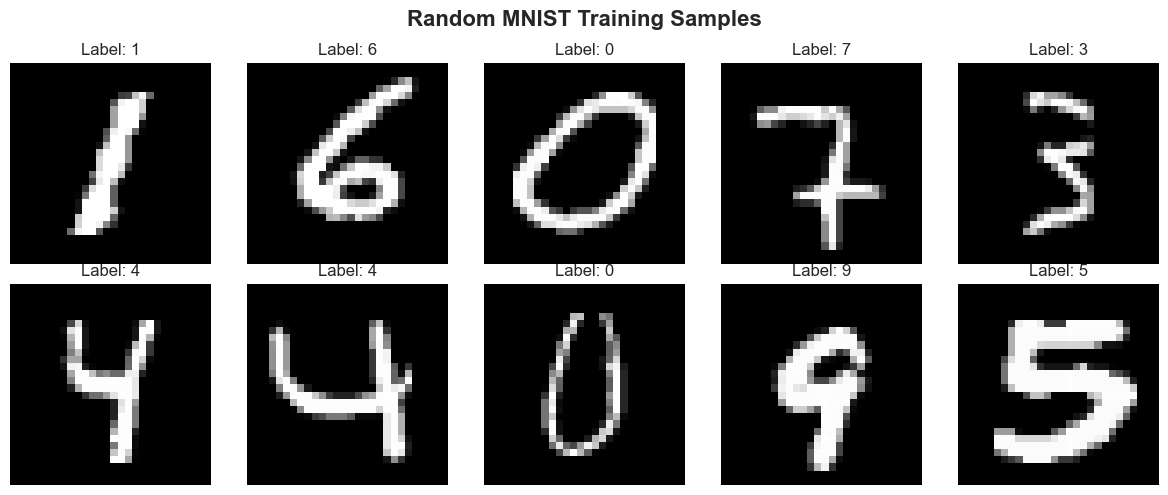

In [4]:
# Display 10 random images from the training set
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
fig.suptitle('Random MNIST Training Samples', fontsize=16, fontweight='bold')

# Randomly select 10 indices
random_indices = np.random.choice(len(x_train), 10, replace=False)

for idx, ax in enumerate(axes.flat):
    image_idx = random_indices[idx]
    ax.imshow(x_train[image_idx], cmap='gray')
    ax.set_title(f'Label: {y_train[image_idx]}', fontsize=12)
    ax.axis('off')

plt.tight_layout()
plt.show()

## Part 3: Pixel Value Distribution Analysis

Since MNIST images are grayscale (single channel), we'll analyze the distribution of pixel intensities across the dataset.

In [5]:
# Flatten all training images into a 1D array for histogram analysis
all_pixels = x_train.flatten()

print(f"Total number of pixels in training set: {len(all_pixels):,}")
print(f"Mean pixel value: {all_pixels.mean():.2f}")
print(f"Std dev of pixel values: {all_pixels.std():.2f}")
print(f"Median pixel value: {np.median(all_pixels):.2f}")

Total number of pixels in training set: 47,040,000
Mean pixel value: 33.32
Std dev of pixel values: 78.57
Median pixel value: 0.00


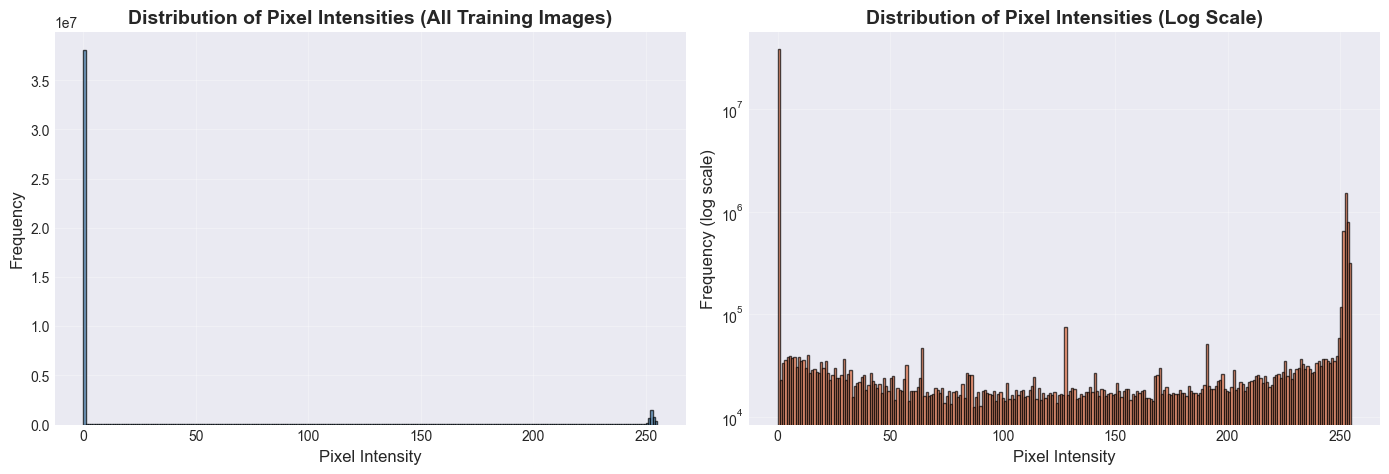


Observations:
- Most pixels are either 0 (black background) or 255 (white foreground)
- This is typical for binary-style handwritten digit images
- Gray values (edges/anti-aliasing) are less frequent


In [6]:
# Create histogram of pixel intensities
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Histogram with all 256 bins
ax1.hist(all_pixels, bins=256, color='steelblue', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Pixel Intensity', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.set_title('Distribution of Pixel Intensities (All Training Images)', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Histogram with log scale to see distribution better
ax2.hist(all_pixels, bins=256, color='coral', edgecolor='black', alpha=0.7)
ax2.set_xlabel('Pixel Intensity', fontsize=12)
ax2.set_ylabel('Frequency (log scale)', fontsize=12)
ax2.set_title('Distribution of Pixel Intensities (Log Scale)', fontsize=14, fontweight='bold')
ax2.set_yscale('log')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nObservations:")
print("- Most pixels are either 0 (black background) or 255 (white foreground)")
print("- This is typical for binary-style handwritten digit images")
print("- Gray values (edges/anti-aliasing) are less frequent")

## Part 4: Label Distribution Analysis

Let's analyze how the digits are distributed in the training and test sets.

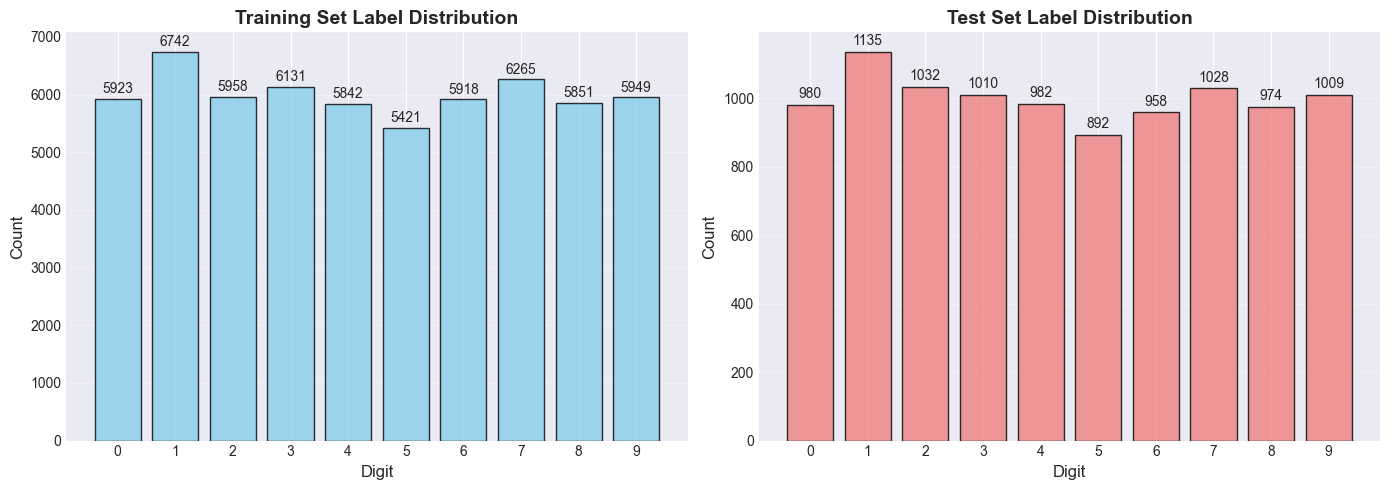


Label Distribution Summary:
Training set - Min: 5421, Max: 6742, Mean: 6000.0
Test set - Min: 892, Max: 1135, Mean: 1000.0

The dataset is fairly balanced across all digits!


In [7]:
# Count occurrences of each digit
train_counts = np.bincount(y_train)
test_counts = np.bincount(y_test)

# Create bar plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

digits = np.arange(10)

# Training set distribution
ax1.bar(digits, train_counts, color='skyblue', edgecolor='black', alpha=0.8)
ax1.set_xlabel('Digit', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.set_title('Training Set Label Distribution', fontsize=14, fontweight='bold')
ax1.set_xticks(digits)
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, count in enumerate(train_counts):
    ax1.text(i, count + 100, str(count), ha='center', fontsize=10)

# Test set distribution
ax2.bar(digits, test_counts, color='lightcoral', edgecolor='black', alpha=0.8)
ax2.set_xlabel('Digit', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)
ax2.set_title('Test Set Label Distribution', fontsize=14, fontweight='bold')
ax2.set_xticks(digits)
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, count in enumerate(test_counts):
    ax2.text(i, count + 20, str(count), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

print("\nLabel Distribution Summary:")
print(f"Training set - Min: {train_counts.min()}, Max: {train_counts.max()}, Mean: {train_counts.mean():.1f}")
print(f"Test set - Min: {test_counts.min()}, Max: {test_counts.max()}, Mean: {test_counts.mean():.1f}")
print("\nThe dataset is fairly balanced across all digits!")

## Part 5: Average Digit Visualization

Let's compute and visualize the average image for each digit class.

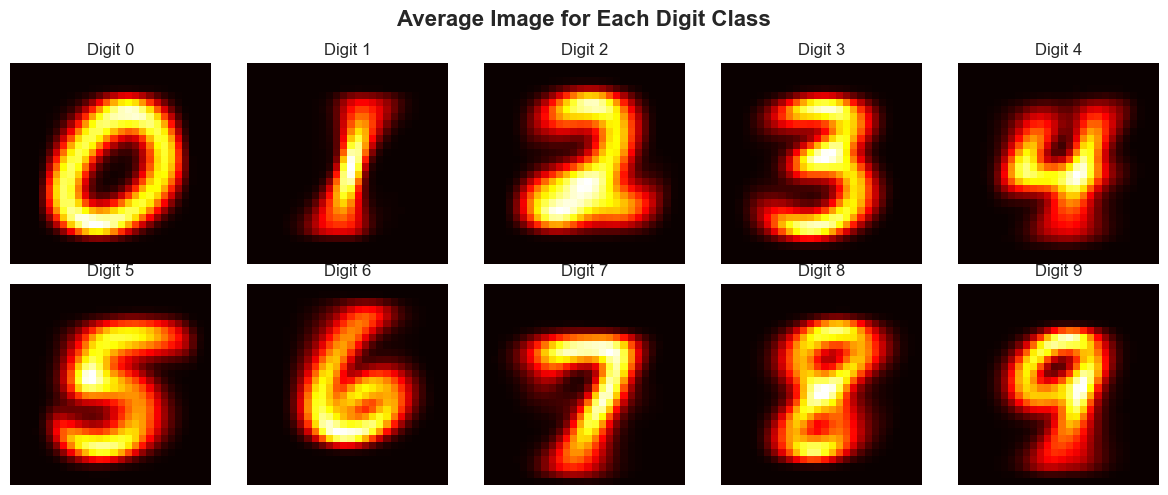

These average images show the 'typical' appearance of each digit.
Notice how some digits (like 1) are more consistent, while others (like 2 or 9) show more variation.This can be useful for understanding class variability in the dataset.


In [8]:
# Compute average image for each digit
avg_digits = np.zeros((10, 28, 28))

for digit in range(10):
    # Find all images of this digit
    digit_images = x_train[y_train == digit]
    # Compute mean across all images
    avg_digits[digit] = digit_images.mean(axis=0)

# Visualize average digits
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
fig.suptitle('Average Image for Each Digit Class', fontsize=16, fontweight='bold')

for digit, ax in enumerate(axes.flat):
    ax.imshow(avg_digits[digit], cmap='hot')
    ax.set_title(f'Digit {digit}', fontsize=12)
    ax.axis('off')

plt.tight_layout()
plt.show()

print("These average images show the 'typical' appearance of each digit.")
print("Notice how some digits (like 1) are more consistent, while others (like 2 or 9) show more variation.This can be useful for understanding class variability in the dataset.")

## Part 6: Loading Model and Making Predictions

Now we'll load a trained model from Task 2 and generate predictions on the test set.

In [9]:
# Load model from Weights & Biases
import os
import glob
import wandb
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Login to W&B
wandb_token = os.getenv("WANDB_TOKEN")
if wandb_token:
    wandb.login(key=wandb_token)
    print("Logged in to W&B successfully!")
else:
    print("Warning: WANDB_TOKEN not found. Attempting to use cached credentials.")

try:
    # Initialize W&B API
    api = wandb.Api()
    
    # Get all runs from the project

    project_path = "mnist_task2"
    print(f"\nFetching runs from project: {project_path}")
    
    runs = api.runs(project_path)
    
    if len(runs) == 0:
        print("No runs found in the project. Falling back to local model loading...")
        raise Exception("No W&B runs found")
    
    # Find the run with the best validation accuracy
    best_run = None
    best_accuracy = 0
    
    for run in runs:
        # Check if run has accuracy metric
        acc = run.summary.get('accuracy', 0) or run.summary.get('val_accuracy', 0)
        if acc > best_accuracy:
            best_accuracy = acc
            best_run = run
    
    print(f"\nBest run found: {best_run.name} (ID: {best_run.id})")
    print(f"Best accuracy: {best_accuracy * 100:.2f}%")
    print(f"Config: {best_run.config}")
    
    # Get model artifacts from the best run
    artifacts = best_run.logged_artifacts()
    model_artifacts = [a for a in artifacts if a.type == 'model']
    
    if len(model_artifacts) == 0:
        print("No model artifacts found. Falling back to local model loading...")
        raise Exception("No model artifacts")
    
    # Download the model artifact
    model_artifact = model_artifacts[0]
    print(f"\nDownloading model artifact: {model_artifact.name}")
    artifact_dir = model_artifact.download()
    
    # Find the .keras file in the downloaded directory
    model_files = glob.glob(os.path.join(artifact_dir, '*.keras')) + glob.glob(os.path.join(artifact_dir, '*.h5'))
    
    if model_files:
        model_path = model_files[0]
        print(f"\nLoading model from W&B: {model_path}")
        model = keras.models.load_model(model_path)
        print("Model loaded successfully from W&B!\n")
        model.summary()
    else:
        print("No model file found in artifact. Falling back to local model loading...")
        raise Exception("No model file in artifact")
        
except Exception as e:
    print(f"\nError loading from W&B: {e}")
    print("Attempting to load from local 'models' directory instead...\n")
    
    # Fallback: Load from local directory
    model_dir = 'models'
    if os.path.exists(model_dir):
        model_files = glob.glob(os.path.join(model_dir, '*.keras')) + glob.glob(os.path.join(model_dir, '*.h5'))
        if model_files:
            # Use the first model found
            model_path = model_files[0]
            print(f"Loading model from local file: {model_path}")
            model = keras.models.load_model(model_path)
            print("Model loaded successfully from local file!\n")
            model.summary()
        else:
            print("No model files found. Please train a model first using train_and_save_wandb.py")
            model = None
    else:
        print("Models directory not found. Please train a model first.")
        model = None

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\sven-\_netrc
wandb: Currently logged in as: gina-gerlach (gina-gerlach-universit-t-luzern) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Logged in to W&B successfully!

Fetching runs from project: mnist_task2

Best run found: hearty-snowflake-10 (ID: r0r7ct3a)
Best accuracy: 98.42%
Config: {'epochs': 5, 'optimizer': 'adam', 'batch_size': 64, 'git_commit': 'unknown', 'extra_layer': True}



wandb:   1 of 1 files downloaded.  



Loading model from W&B: c:\Users\sven-\GIT\dsta-2025-1\artifacts\mnist_model_r0r7ct3a-v0\mnist_model_r0r7ct3a.keras
Model loaded successfully from W&B!



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │        51,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 211,136 (824.75 KB)

 Trainable params: 70,378 (274.91 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 140,758 (549.84 KB)

In [10]:
# Prepare test data (normalize and reshape)
if model is not None:
    # Normalize pixel values
    x_test_norm = x_test.astype("float32") / 255.0
    # Reshape to add channel dimension
    x_test_norm = np.expand_dims(x_test_norm, -1)
    
    print(f"Test data shape after preprocessing: {x_test_norm.shape}")
    
    # Make predictions
    print("\nMaking predictions on test set...")
    predictions_proba = model.predict(x_test_norm, verbose=0)
    predictions = np.argmax(predictions_proba, axis=1)
    
    print(f"Predictions shape: {predictions.shape}")
    print(f"Probability matrix shape: {predictions_proba.shape}")
    print(f"\nFirst 10 predictions: {predictions[:10]}")
    print(f"First 10 ground truth: {y_test[:10]}")

Test data shape after preprocessing: (10000, 28, 28, 1)

Making predictions on test set...
Predictions shape: (10000,)
Probability matrix shape: (10000, 10)

First 10 predictions: [7 2 1 0 4 1 4 9 5 9]
First 10 ground truth: [7 2 1 0 4 1 4 9 5 9]


## Part 7: Model Performance Analysis

In [11]:
if model is not None:
    # Calculate accuracy
    accuracy = np.mean(predictions == y_test)
    print(f"Test Accuracy: {accuracy * 100:.2f}%")
    
    # Calculate number of correct and incorrect predictions
    correct = np.sum(predictions == y_test)
    incorrect = np.sum(predictions != y_test)
    
    print(f"\nCorrect predictions: {correct}/{len(y_test)}")
    print(f"Incorrect predictions: {incorrect}/{len(y_test)}")

Test Accuracy: 98.93%

Correct predictions: 9893/10000
Incorrect predictions: 107/10000


### Visualizing Correct and Incorrect Predictions

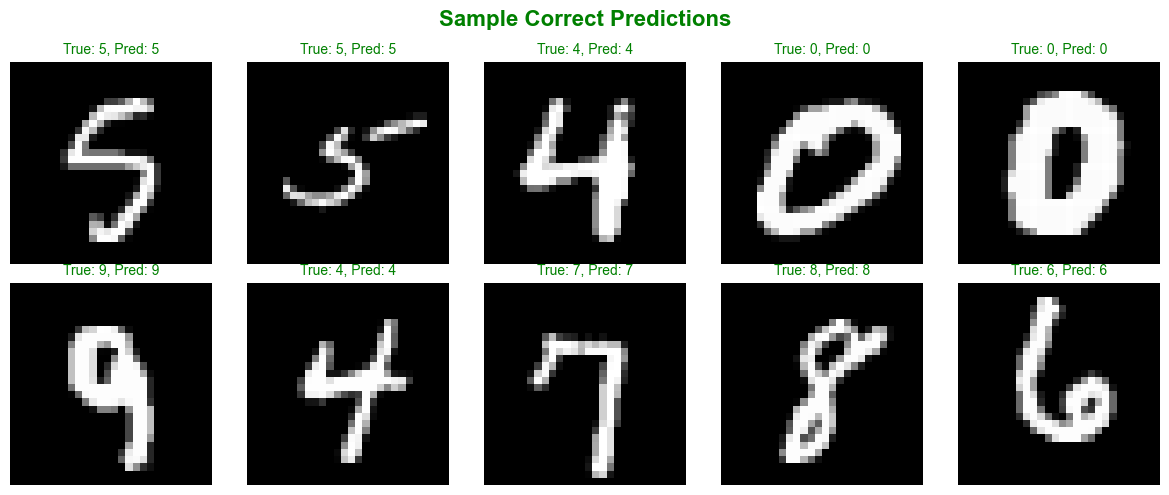

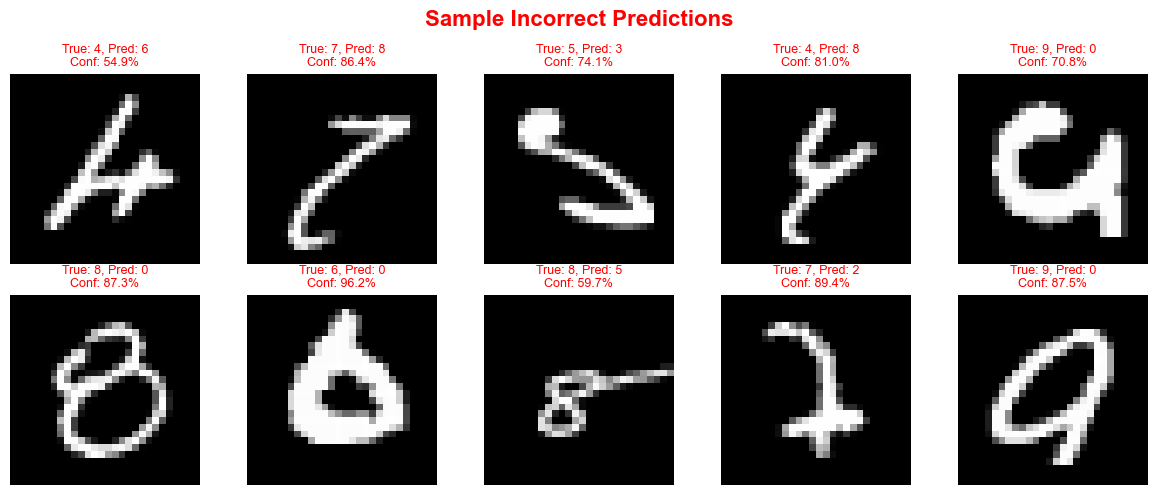

In [12]:
if model is not None:
    # Find indices of correct and incorrect predictions
    correct_indices = np.where(predictions == y_test)[0]
    incorrect_indices = np.where(predictions != y_test)[0]
    
    # Display some correct predictions
    fig, axes = plt.subplots(2, 5, figsize=(12, 5))
    fig.suptitle('Sample Correct Predictions', fontsize=16, fontweight='bold', color='green')
    
    sample_correct = np.random.choice(correct_indices, 10, replace=False)
    
    for idx, ax in enumerate(axes.flat):
        img_idx = sample_correct[idx]
        ax.imshow(x_test[img_idx], cmap='gray')
        ax.set_title(f'True: {y_test[img_idx]}, Pred: {predictions[img_idx]}', 
                     fontsize=10, color='green')
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Display some incorrect predictions
    if len(incorrect_indices) > 0:
        fig, axes = plt.subplots(2, 5, figsize=(12, 5))
        fig.suptitle('Sample Incorrect Predictions', fontsize=16, fontweight='bold', color='red')
        
        num_incorrect_to_show = min(10, len(incorrect_indices))
        sample_incorrect = np.random.choice(incorrect_indices, num_incorrect_to_show, replace=False)
        
        for idx, ax in enumerate(axes.flat):
            if idx < num_incorrect_to_show:
                img_idx = sample_incorrect[idx]
                ax.imshow(x_test[img_idx], cmap='gray')
                confidence = predictions_proba[img_idx][predictions[img_idx]] * 100
                ax.set_title(f'True: {y_test[img_idx]}, Pred: {predictions[img_idx]}\nConf: {confidence:.1f}%', 
                             fontsize=9, color='red')
                ax.axis('off')
            else:
                ax.axis('off')
        
        plt.tight_layout()
        plt.show()
    else:
        print("No incorrect predictions found, Perfect accuracy")

## Part 8: Confusion Matrix

A confusion matrix shows which digits are frequently misclassified.

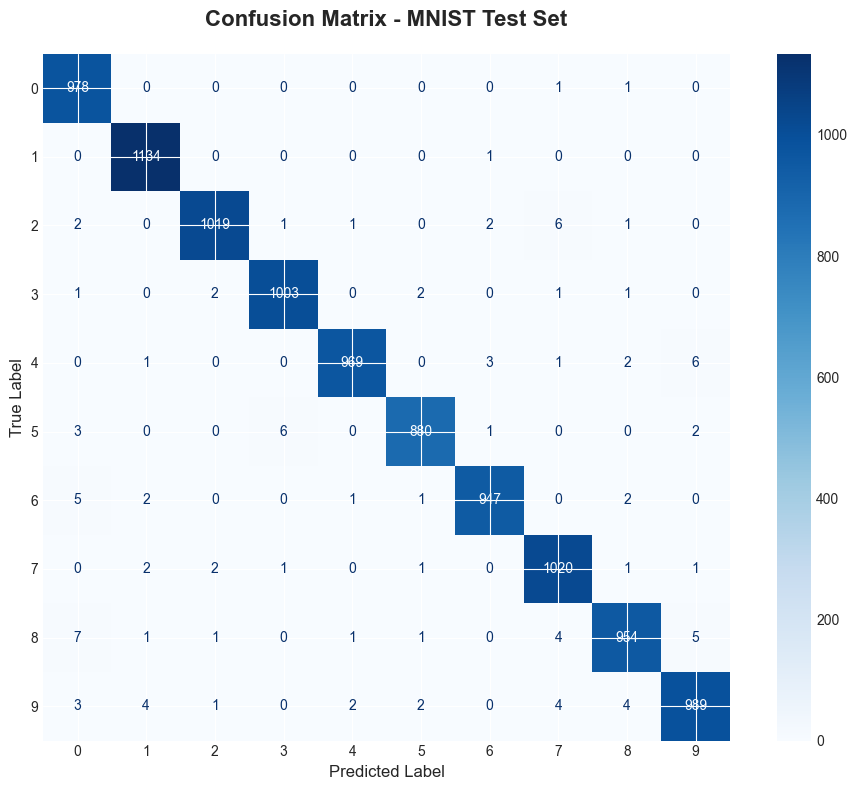


Confusion Matrix Interpretation:
- Diagonal elements: correct predictions
- Off-diagonal elements: misclassifications
- Darker blue = higher count


In [13]:
if model is not None:
    # Compute confusion matrix
    cm = confusion_matrix(y_test, predictions)
    
    # Display confusion matrix as heatmap
    fig, ax = plt.subplots(figsize=(10, 8))
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
    disp.plot(cmap='Blues', ax=ax, colorbar=True)
    
    ax.set_title('Confusion Matrix - MNIST Test Set', fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('Predicted Label', fontsize=12)
    ax.set_ylabel('True Label', fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
    print("\nConfusion Matrix Interpretation:")
    print("- Diagonal elements: correct predictions")
    print("- Off-diagonal elements: misclassifications")
    print("- Darker blue = higher count")

### Normalized Confusion Matrix

Let's also look at the confusion matrix normalized by true labels to see the proportion of errors per each digit.

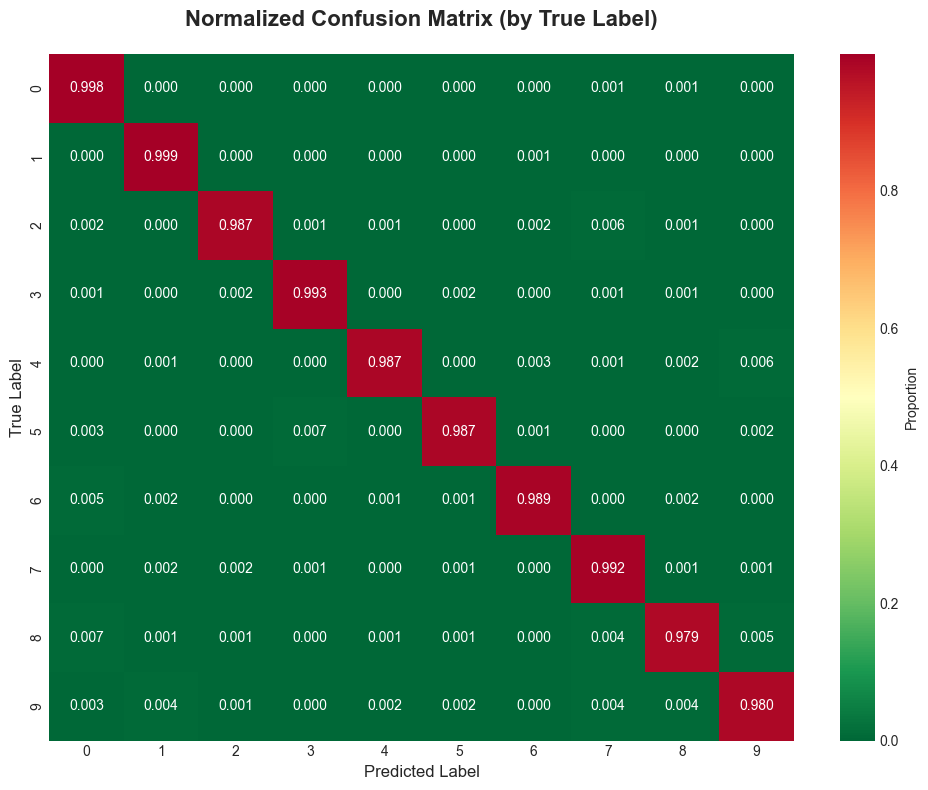


Normalized Confusion Matrix shows the proportion of predictions for each true class.
Values close to 1.0 on the diagonal indicate high accuracy for that digit.


In [14]:
if model is not None:
    # Compute normalized confusion matrix
    cm_normalized = confusion_matrix(y_test, predictions, normalize='true')
    
    # Display normalized confusion matrix
    fig, ax = plt.subplots(figsize=(10, 8))
    
    sns.heatmap(cm_normalized, annot=True, fmt='.3f', cmap='RdYlGn_r', 
                xticklabels=np.arange(10), yticklabels=np.arange(10),
                cbar_kws={'label': 'Proportion'}, ax=ax)
    
    ax.set_title('Normalized Confusion Matrix (by True Label)', fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('Predicted Label', fontsize=12)
    ax.set_ylabel('True Label', fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
    print("\nNormalized Confusion Matrix shows the proportion of predictions for each true class.")
    print("Values close to 1.0 on the diagonal indicate high accuracy for that digit.")

## Part 9: Classification Report

Now we generate a detailed classification report showing precision, recall, and F1-score for each digit.

In [15]:
if model is not None:
    # Generate classification report
    report = classification_report(y_test, predictions, target_names=[f'Digit {i}' for i in range(10)])
    print("Classification Report:")
    print("=" * 60)
    print(report)
    
    print("\nMetrics Explanation:")
    print("- Precision: Of all predictions for a digit, how many were correct?")
    print("- Recall: Of all actual instances of a digit, how many were found?")
    print("- F1-Score: Harmonic mean of precision and recall")
    print("- Support: Number of true instances for each digit in the test set")

Classification Report:
              precision    recall  f1-score   support

     Digit 0       0.98      1.00      0.99       980
     Digit 1       0.99      1.00      1.00      1135
     Digit 2       0.99      0.99      0.99      1032
     Digit 3       0.99      0.99      0.99      1010
     Digit 4       0.99      0.99      0.99       982
     Digit 5       0.99      0.99      0.99       892
     Digit 6       0.99      0.99      0.99       958
     Digit 7       0.98      0.99      0.99      1028
     Digit 8       0.99      0.98      0.98       974
     Digit 9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000


Metrics Explanation:
- Precision: Of all predictions for a digit, how many were correct?
- Recall: Of all actual instances of a digit, how many were found?
- F1-Score: Harmonic mean of precision and recall
- Support: 

## Part 10: Per-Class Accuracy Analysis

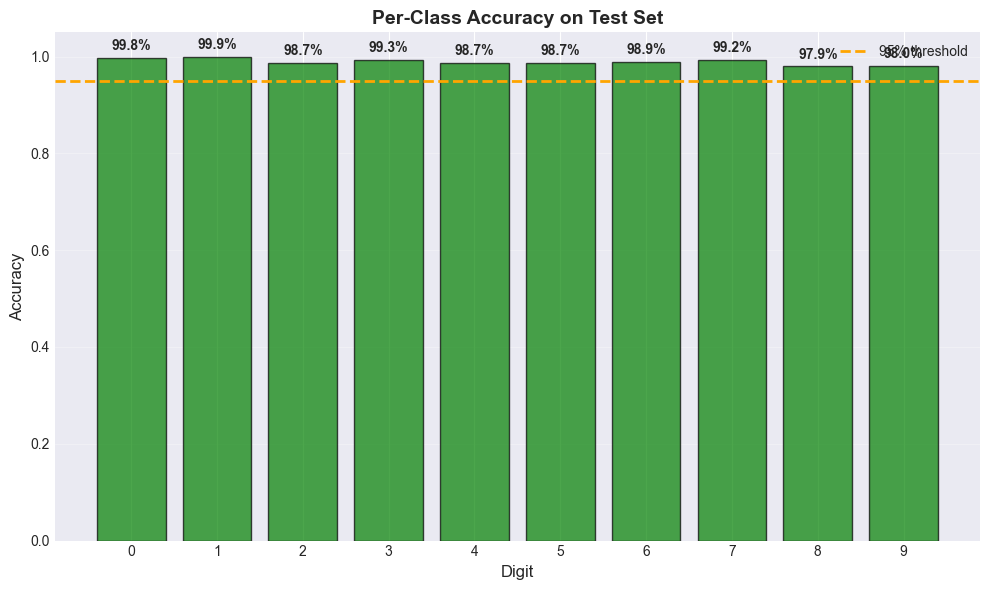


Best performing digit: 1 (99.91%)
Worst performing digit: 8 (97.95%)
Overall test accuracy: 98.91%


In [16]:
if model is not None:
    # Calculate per-class accuracy
    per_class_accuracy = []
    
    for digit in range(10):
        # Find all instances of this digit
        digit_mask = y_test == digit
        digit_predictions = predictions[digit_mask]
        digit_true = y_test[digit_mask]
        
        # Calculate accuracy for this digit
        accuracy = np.mean(digit_predictions == digit_true)
        per_class_accuracy.append(accuracy)
    
    # Plot per-class accuracy
    fig, ax = plt.subplots(figsize=(10, 6))
    
    colors = ['red' if acc < 0.95 else 'green' for acc in per_class_accuracy]
    bars = ax.bar(range(10), per_class_accuracy, color=colors, edgecolor='black', alpha=0.7)
    
    ax.set_xlabel('Digit', fontsize=12)
    ax.set_ylabel('Accuracy', fontsize=12)
    ax.set_title('Per-Class Accuracy on Test Set', fontsize=14, fontweight='bold')
    ax.set_xticks(range(10))
    ax.set_ylim([0, 1.05])
    ax.axhline(y=0.95, color='orange', linestyle='--', label='95% threshold', linewidth=2)
    ax.grid(True, alpha=0.3, axis='y')
    ax.legend()
    
    # Add value labels on bars
    for i, (bar, acc) in enumerate(zip(bars, per_class_accuracy)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{acc*100:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary
    best_digit = np.argmax(per_class_accuracy)
    worst_digit = np.argmin(per_class_accuracy)
    
    print(f"\nBest performing digit: {best_digit} ({per_class_accuracy[best_digit]*100:.2f}%)")
    print(f"Worst performing digit: {worst_digit} ({per_class_accuracy[worst_digit]*100:.2f}%)")
    print(f"Overall test accuracy: {np.mean(per_class_accuracy)*100:.2f}%")

## Summary and Conclusions

### What We Learned:

1. **Data Structure:**
   - MNIST images are 28×28 grayscale images represented as NumPy arrays
   - Pixel values range from 0 (black) to 255 (white)
   - The dataset is well-balanced across all 10 digit classes

2. **Pixel Distribution:**
   - Most pixels are either 0 (background) or 255 (foreground)
   - This bimodal distribution is typical for binary-style images
   - Gray values appear at edges due to anti-aliasing

3. **Model Performance:**
   - The trained CNN achieves high accuracy on the test set (~99%)
   - The confusion matrix reveals which digits are most commonly confused
   - Some digits (like 1 and 0) are easier to classify than others (like 8 or 9)

4. **NumPy for Data Analysis:**
   - NumPy arrays provide efficient storage and manipulation of image data
   - Array operations enable quick statistical analysis across the entire dataset
   - Shape manipulation (flatten, reshape, expand_dims) is crucial for preprocessing

5. **Visualization Insights:**
   - Matplotlib enables understanding of data distribution and model behavior
   - Confusion matrices reveal systematic misclassification patterns
   - Average digit images show the "canonical" representation of each class

### Version Control Challenges with Jupyter Notebooks

Version controlling this notebook with Git presented some challenges:

- **Large JSON diffs**: Notebooks store outputs, execution counters, and metadata, leading to 1,000+ line diffs for small changes
- **Noisy commits**: Re-running cells changes the notebook file even when code stays the same
- **Trade-off decision**: We kept outputs in Git to show visualizations directly, making the notebook accessible without re-running code or W&B access

**Better practices for production:**
- Use tools like `nbstripout` to automatically remove outputs before committing
- Keep analysis logic in separate `.py` scripts, use notebooks only for exploration
- Consider tools like ReviewNB or nbdime for better notebook diffs

Despite these challenges, notebooks remain excellent for interactive data exploration and documentation when outputs are preserved for sharing results.